100.320761515


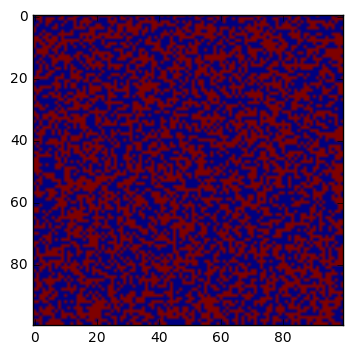

In [18]:
import numpy

def iterated_conditional_modes(unaries, beta, labels=None):
    shape = unaries.shape[0:2]  # tuple of how many entries the first (0) and second (1) dimension has
    n_labels = unaries.shape[2] # how many entries does the third (2) dimension of unaries have?
    if labels is None:
        labels = numpy.argmin(unaries, axis=2) # returns the indices (x0, x1) of the minimum values along the label-dimension (2)
                                               # use these indices as labels if none are given
    continue_search = True
    while (continue_search):
        continue_search = False
        for x0 in range (1, shape[0]-1):
            for x1 in range (1, shape[1]-1):
                current_label = labels[x0, x1]
                min_energy = float('inf')
                best_label = None
            for l in range(n_labels):
                # evaluate cost
                energy = 0.0
                
                # unary terms
                energy += unaries[x0, x1, l]
                
                # pairwise terms
                energy += beta if (labels[x0-1, x1] != l) else 0 # left
                energy += beta if (labels[x0+1, x1] != l) else 0 # right
                energy += beta if (labels[x0, x1+1] != l) else 0 # top
                energy += beta if (labels[x0, x1-1] != l) else 0 # bottom
                
                if energy < min_energy:
                    min_energy = energy
                    best_label = l
                    
            if best_label != current_label:
                labels[x0, x1] = best_label
                continue_search = True
    
    print(min_energy)
    return labels


if __name__ == "__main__":
    import matplotlib.pyplot as plt
    shape = [100, 100]
    n_labels = 2 # binary
    # unaries
    unaries = numpy.random.rand(shape[0], shape[1], n_labels) # returns array of the given shape with numbers in [0, 1)
    # regularizer strength
    beta = 100.0
    labels = iterated_conditional_modes(unaries, beta = beta)
    plt.imshow(labels)
    plt.show()
